In [1]:
%config InlineBackend.figure_formats = {"retina", "png"}

import logging
logging.basicConfig(level=logging.INFO)

import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (6, 5)
plt.rcParams["font.size"] = 14

import superscreen as sc
import superscreen.geometry as geo

SAVE_FIGURES = True

In [2]:
def make_ring(
    inner_radius=2.5,
    outer_radius=5,
    Lambda=1,
    length_units="um",
    square=False,
):
    if square:
        outer_points = geo.square(2 * outer_radius, points_per_side=150)
        inner_points = geo.square(2 * inner_radius, points_per_side=75)
        bbox = geo.square(1.25 * 2 * outer_radius, points_per_side=10)
    else:
        outer_points = geo.circle(outer_radius, points=500)
        inner_points = geo.circle(inner_radius, points=300)
        bbox = geo.circle(1.4 * outer_radius, points=50)

    layers = [sc.Layer("base", Lambda=Lambda, z0=0)]
    films = [sc.Polygon("ring", layer="base", points=outer_points)]
    holes = [sc.Polygon("hole", layer="base", points=inner_points)]
    abstract_regions = [
        sc.Polygon("bbox", layer="base", points=bbox),
    ]
    return sc.Device(
        "ring",
        layers=layers,
        films=films,
        holes=holes,
        abstract_regions=abstract_regions,
        length_units=length_units,
    )

INFO:superscreen.device:Generating mesh...
INFO:superscreen.device:Finished generating mesh with 6045 points and 12018 triangles.
INFO:superscreen.device:Calculating mass matrix.
INFO:superscreen.device:Calculating weight matrix.
INFO:superscreen.device:Calculating Laplace operator.
INFO:superscreen.device:Calculating kernel matrix.
INFO:superscreen.device:Generating mesh...
INFO:superscreen.device:Finished generating mesh with 6344 points and 12567 triangles.
INFO:superscreen.device:Calculating mass matrix.
INFO:superscreen.device:Calculating weight matrix.
INFO:superscreen.device:Calculating Laplace operator.
INFO:superscreen.device:Calculating kernel matrix.
INFO:superscreen.device:Generating mesh...
INFO:superscreen.device:Optimizing mesh with 12018 triangles.
INFO:superscreen.device:Finished generating mesh with 6045 points and 12018 triangles.
INFO:superscreen.device:Calculating mass matrix.
INFO:superscreen.device:Calculating weight matrix.
INFO:superscreen.device:Calculating La

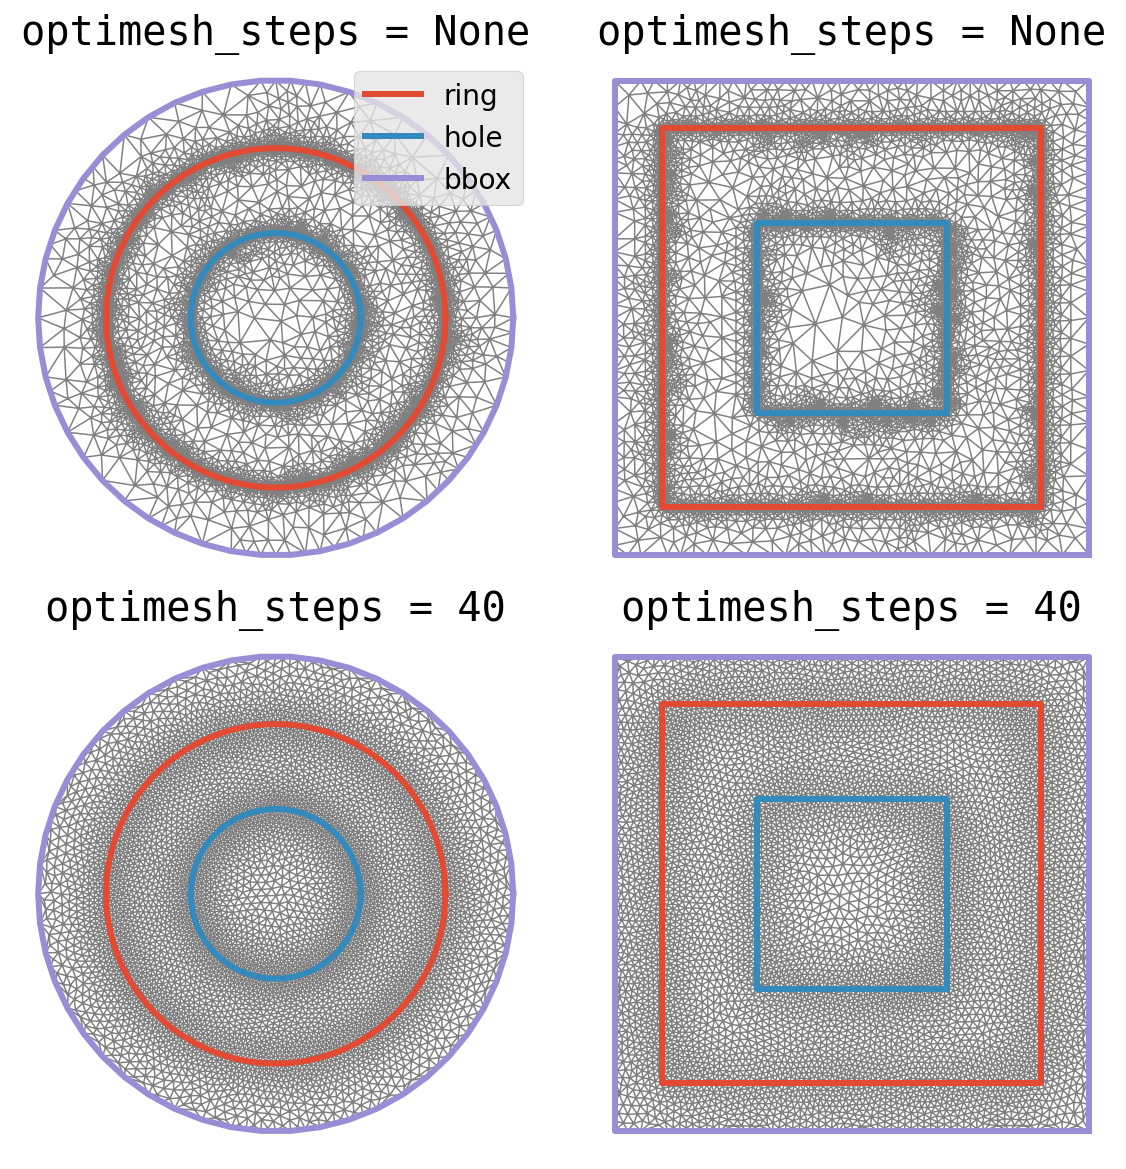

In [3]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(
    2, 2, figsize=(8, 8), facecolor="w", constrained_layout=True
)
# Create the Devices
ring = make_ring(square=False)
square_ring = make_ring(square=True)
# min_triangles specifies the minimum number of mesh elements.
min_triangles = 12000
# optimesh_steps specifies the the number of iterations of
# optimesh optimization to perform.
# Set optimesh_steps=None to disable optimesh optimization.
optimesh_steps = (None, 40)
# For more meshing options, see the docstring for Device.make_mesh().
for opt_steps, row in zip(optimesh_steps, axes):
    title = f"optimesh_steps = {opt_steps}"
    for device, ax in zip((ring, square_ring), row):
        # Generate the mesh
        device.make_mesh(
            min_triangles=min_triangles,
            optimesh_steps=opt_steps,
        )
        # Visualize the mesh
        device.plot_mesh(ax=ax, color="gray", linewidth=0.75)
        device.plot_polygons(ax=ax, linewidth=3, legend=False)
        ax.axis("off")
        ax.set_title(title, fontfamily="monospace")
axes[0, 0].legend(loc="best")

if SAVE_FIGURES:
    fig.savefig("../images/mesh.pdf")

INFO:superscreen.brandt:Calculating base response to applied field.
INFO:superscreen.brandt:Calculating base response to applied field.


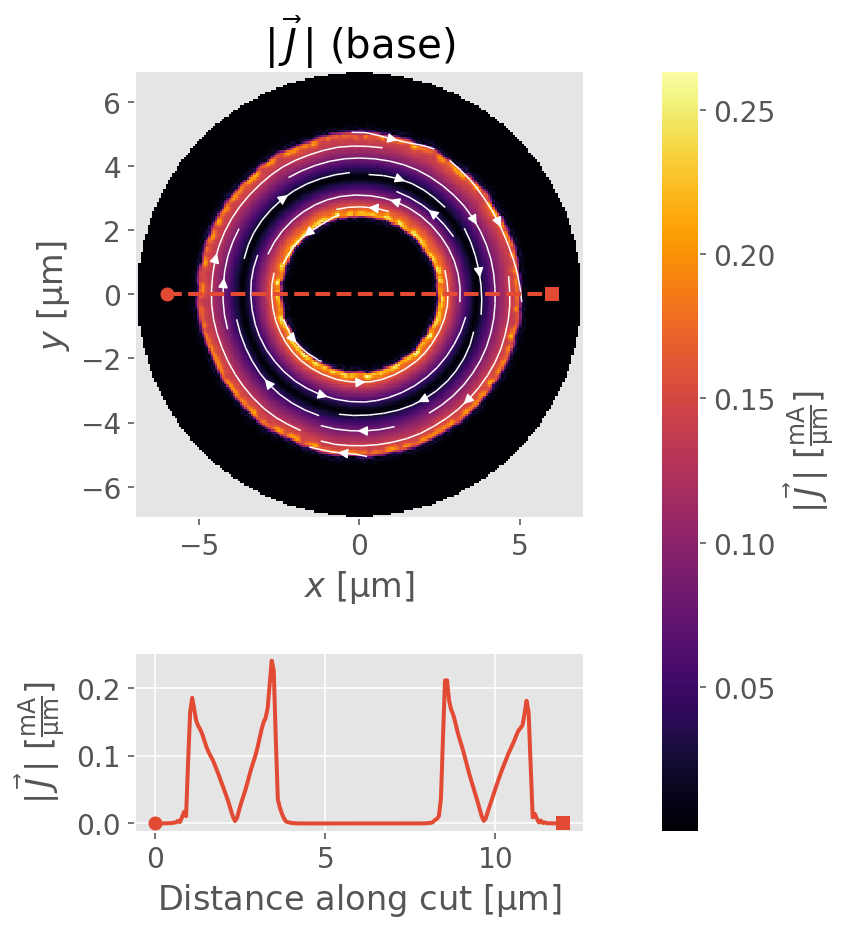

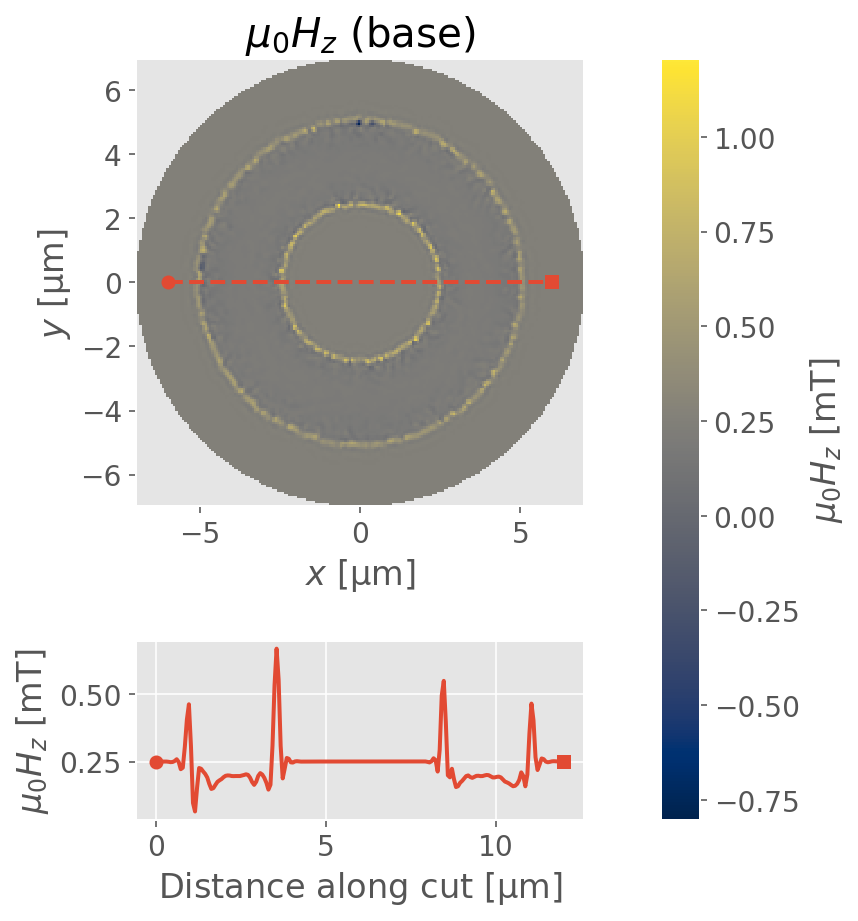

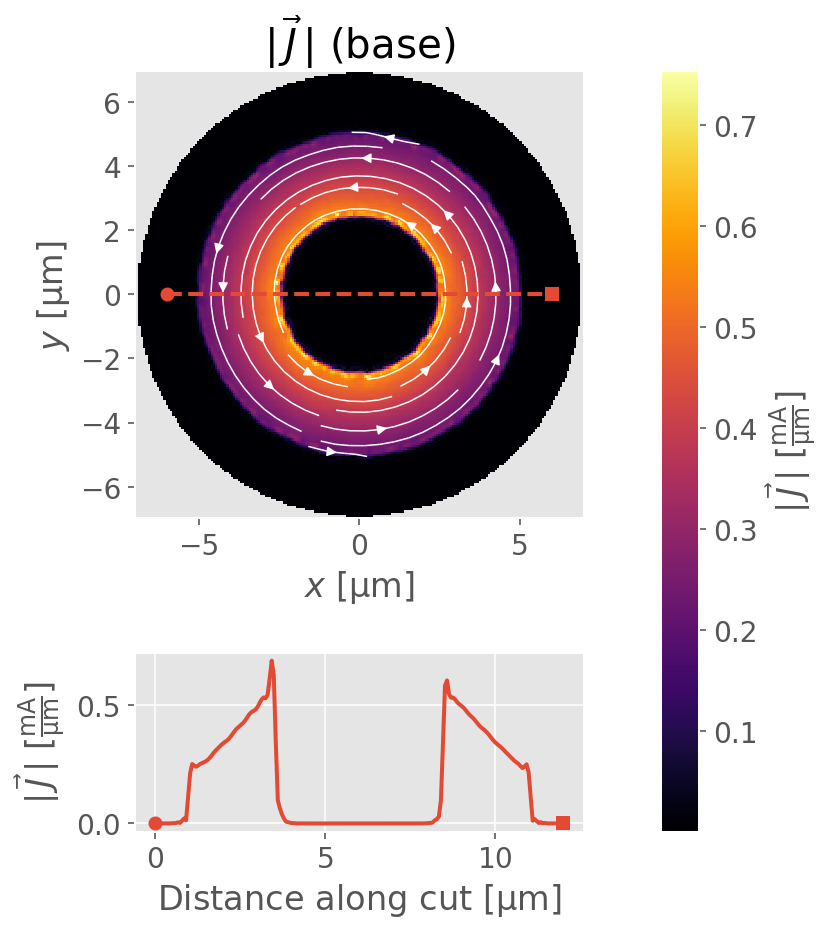

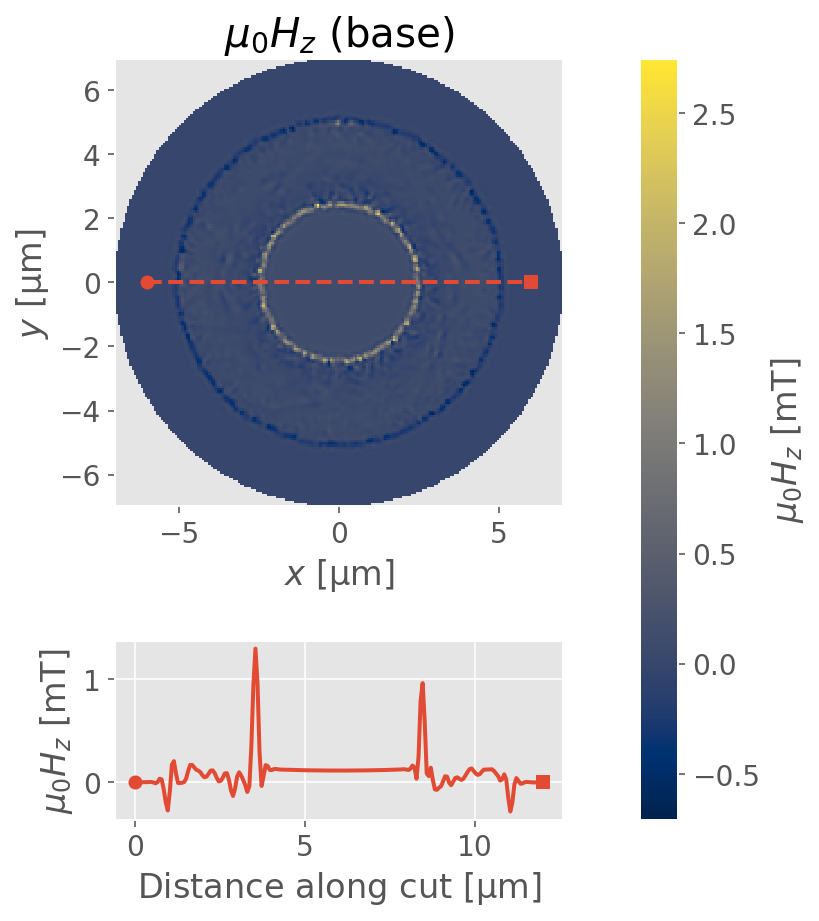

In [4]:
# Simulate the response to a uniform applied field of 0.25 mT
applied_field = sc.sources.ConstantField(0.25)
field_units = "mT"

solutions = sc.solve(
    device=ring,
    applied_field=applied_field,
    field_units=field_units,
)
assert len(solutions) == 1 # Since there is only one layer
uniform_field = solutions[-1]

# Simulate a current circulating around the hole in the ring.
circulating_currents = {"hole": "1 mA"}

solutions = sc.solve(
    device=ring,
    applied_field=None,
    circulating_currents=circulating_currents
)
assert len(solutions) == 1 # Since there is only one layer
trapped_flux = solutions[-1]

n_cross = 201
xs = np.linspace(-6, 6, n_cross)
cross_section_coords = np.stack([xs, 0 * xs], axis=1)
# cross_section_coords = None

for solution in (uniform_field, trapped_flux):
    solution.plot_currents(
        figsize=(6, 7), cross_section_coords=cross_section_coords, units="mA/um",
    )
    solution.plot_fields(figsize=(6, 7), cross_section_coords=cross_section_coords)

In [ ]:
# Simulate the response to a uniform applied field of 0.25 mT
applied_field = sc.sources.ConstantField(0.25)
field_units = "mT"

solutions = sc.solve(
    device=square_ring,
    applied_field=applied_field,
    field_units=field_units,
)
assert len(solutions) == 1 # Since there is only one layer
uniform_field = solutions[-1]

# Simulate a current circulating around the hole in the ring.
circulating_currents = {"hole": "1 mA"}

solutions = sc.solve(
    device=square_ring,
    applied_field=None,
    circulating_currents=circulating_currents
)
assert len(solutions) == 1 # Since there is only one layer
trapped_flux = solutions[-1]

n_cross = 201
xs = np.linspace(-5.5, 5.5, n_cross)
cross_section_coords = [
    np.stack([xs, xs], axis=1),
    np.stack([xs, 0 * xs], axis=1),
]
# cross_section_coords = None

for solution in (uniform_field, trapped_flux):
    solution.plot_currents(
        figsize=(6, 7), cross_section_coords=cross_section_coords, units="mA/um",
    )
    solution.plot_fields(figsize=(6, 7), cross_section_coords=cross_section_coords)

INFO:superscreen.brandt:Calculating base response to applied field.
